In [22]:
import numpy as np 
import matplotlib.pyplot as plt 

# 1. Sliding Window Embeddings

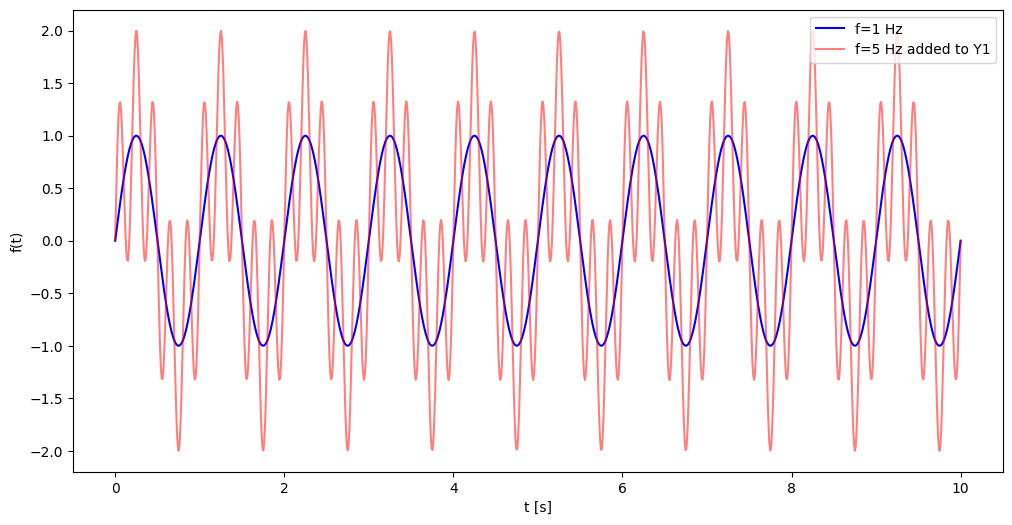

In [23]:
# first create the sample function. We will impose some periodicity to see what structures appear in R2 and R3
t = np.linspace(0, 10, 1000)

f1 = 1 #Hz
f2 = 5  
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

y1 = np.sin(w1*t)
y2 = y1+np.sin(w2*t)
plt.figure(figsize=(12,6))
plt.plot(t,y1, 'b', label='f={0} Hz'.format(f1))
plt.plot(t,y2, 'r', alpha=0.5, label='f={0} Hz added to Y1'.format(f2))
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.show()

In [3]:
def embed_Nd(y, N=2, periodic_boundary=False): 
    pts = [] 
    for i in range(len(y)): 
        if i > len(y)-N: 
            if not periodic_boundary:
                break 
        y_shift = np.roll(y, -i) 
        pts.append(y_shift[0:N])
        
    return np.array(pts)

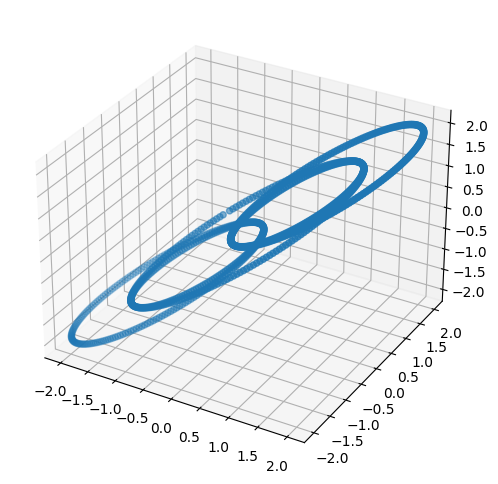

(998, 3)


In [24]:
# let's try embedding our funky signal 
from mpl_toolkits.mplot3d import Axes3D
emb3 = embed_Nd(y2, N=3)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb3[:,0], emb3[:,1], emb3[:,2])

plt.show()
print(emb3.shape)

Ideally, we would embed into many more dimensions and then use something like PCA to reduce to 2 or 3 for visualization. 

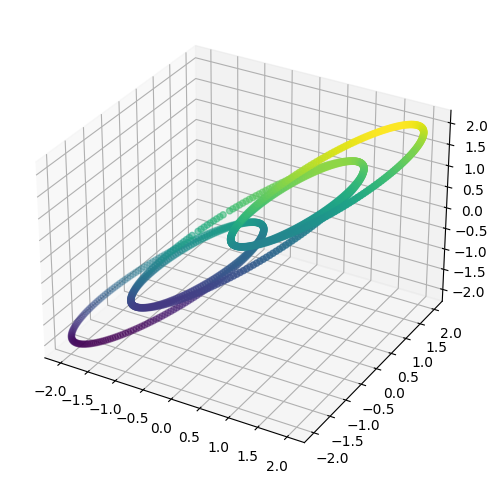

(997, 4)


In [25]:
# The same thing in 4d using color to represent fourth dimension 
emb4 = embed_Nd(y2, N=4)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb4[:,0], emb4[:,1], emb4[:,2], c=emb4[:,3])

plt.show()
print(emb4.shape)

# 2. Persistence Diagrams
see: https://scikit-tda.org/ for documentation

In [6]:
# Imports for scikit-tda
import ripser
from ripser import Rips
import persim
from persim import plot_diagrams

In [7]:
# check the shape of our data
print(y2.shape, emb4.shape)

(1000,) (997, 4)


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Persistence Diagram for y=sin(t)+sin(5t)')

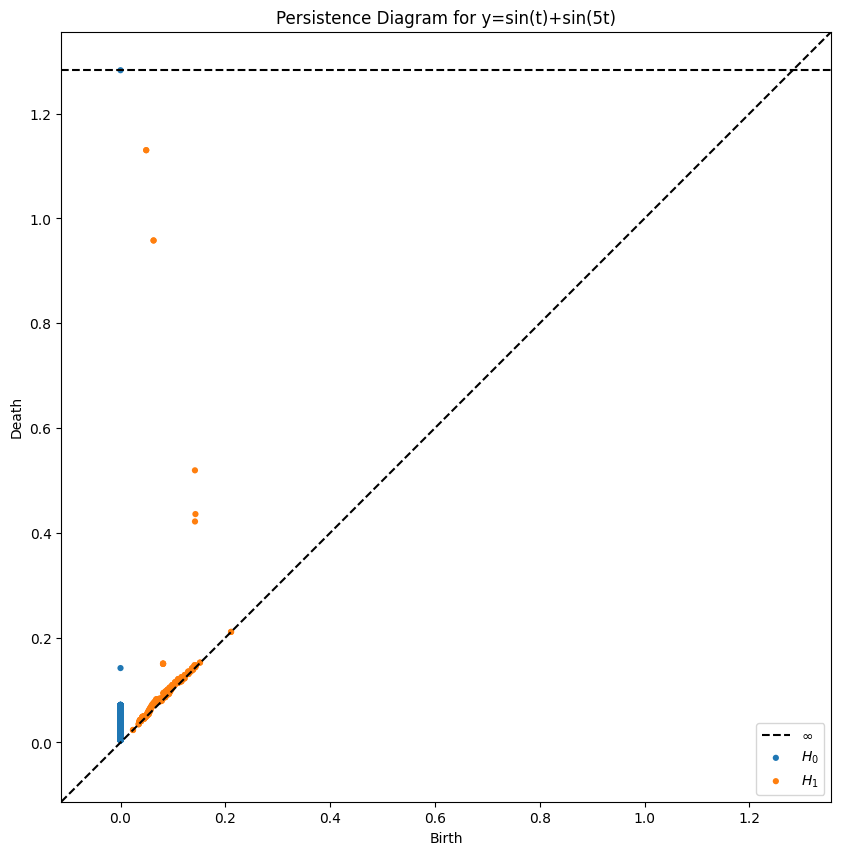

In [20]:

plt.figure(figsize=(10,10))

# standard scikit-learn fit,transform syntax
rips = Rips()
diagrams = rips.fit_transform(emb4)
rips.plot(diagrams)

plt.title('Persistence Diagram for y=sin(t)+sin(5t)')

# 3 Example: A blob of data

In [26]:
# define 500 random points within a sphere

theta = 2*np.pi*np.random.rand(500)
r = np.sqrt(np.random.rand(500))
x = 0.25*r*np.cos(theta)
y = 0.25*r*np.sin(theta)

In [11]:
blob = np.array([x, y]).T # we want data points to be rows, not columns

# compute persistence homology from ripser graph
rips = Rips()
diagrams = rips.fit_transform(blob)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


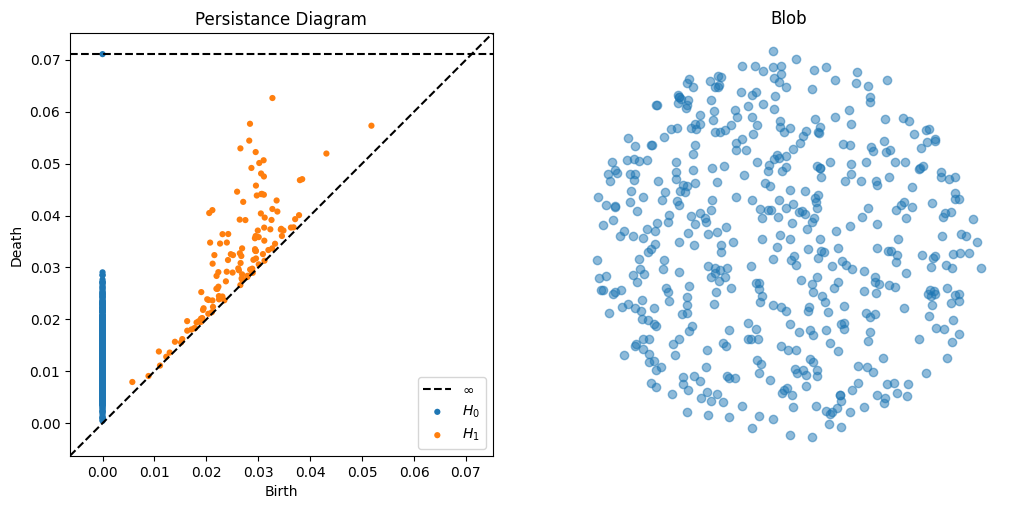

In [12]:
# plot everything

fig = plt.figure(figsize=(12,10)) 
ax = fig.add_subplot(1, 2, 1, )

rips.plot(diagrams)
ax.set_title('Persistence Diagram')

ax = fig.add_subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)
ax.grid('off')
ax.axis('off')
ax.set_title('Blob')
ax.set_aspect('equal')
plt.show()


# 4 Example 2: Data forms a circle

In [13]:
# generate datapoints on a circle (with some noise)

theta = 2*np.pi*np.random.rand(1000)
x = np.cos(theta)+0.25*np.random.rand(1000)
y = np.sin(theta)+0.25*np.random.rand(1000)

circle = np.array([x, y]).T

In [14]:
# compute persistence diagram
rips = Rips()
diagrams = rips.fit_transform(circle)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


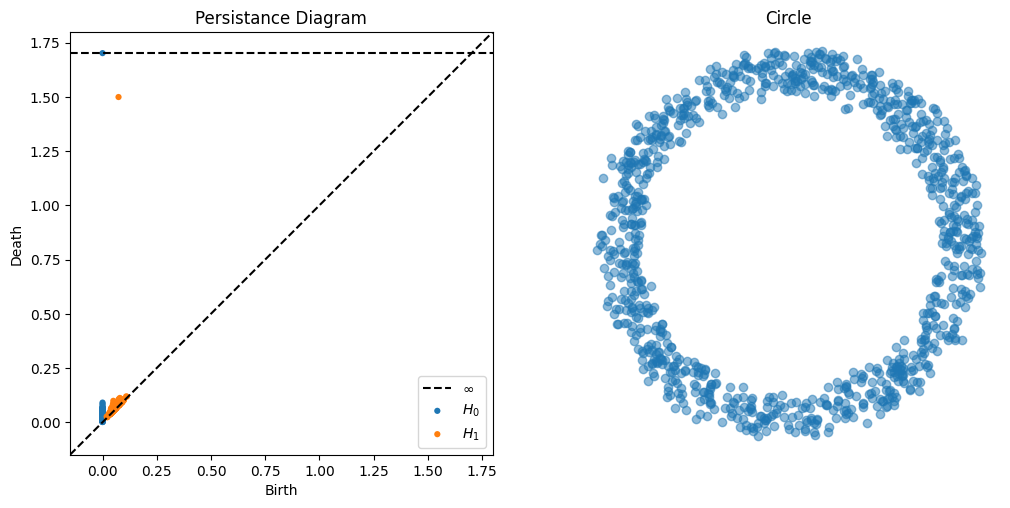

In [15]:
# make a pretty plot 

fig = plt.figure(figsize=(12,10)) 
ax = fig.add_subplot(1, 2, 1, )


rips.plot(diagrams)
ax.set_title('Persistence Diagram')

ax = fig.add_subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)
ax.grid('off')
ax.axis('off')
ax.set_title('Circle')
ax.set_aspect('equal')
plt.savefig('./persistence-circle.pdf')


# 5 Example 3: Data forms a torus

In [17]:
import tadasets
torus = tadasets.torus(n=2000, c=5, a=2.5)

In [18]:
# compute persitence diagram 
rips = Rips()
diagrams = rips.fit_transform(torus)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


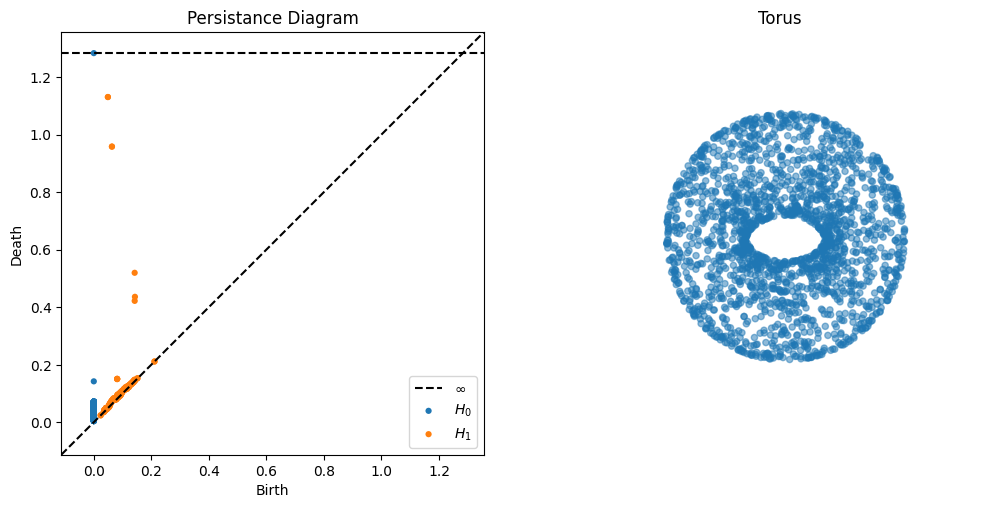

In [27]:
# plot the results 

fig = plt.figure(figsize=(12,12)) 
ax = fig.add_subplot(1, 2, 1, )
rips.plot(diagrams)
ax.set_title('Persistance Diagram')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(torus[:,0], torus[:,1], torus[:,2], alpha=0.5)
ax.view_init(elev=67.5, azim=0)
ax.grid('off')
ax.axis('off')
ax.set_title('Torus')
plt.show()
